In [ ]:
# Feature Engineering Notebook for DevOps Learners

# 1. Import Libraies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


# 2. Load Cleaned Dataset
df = pd.read_csv('../data/raw/house_data.csv')
df.head()


,price,sqft,bedrooms,bathrooms,location,year_built,condition
0,495000,1527,2,1.5,Suburb,1956,Good
1,752000,2526,3,2.5,Downtown,1998,Excellent
2,319000,1622,2,1.5,Rural,1975,Fair
3,1210000,3102,4,3.0,Waterfront,2005,Excellent
4,462000,1835,2,2.0,Urban,1982,Good


In [2]:
# 3. initial Data Exploration

# Print dataset shape: rows x columns
print(f'Dataset shape (columns, rows): {df.shape}')

# Print summary of column names, types, null count, etc.
df.info()


Dataset shape (columns, rows): (84, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       84 non-null     int64  
 1   sqft        84 non-null     int64  
 2   bedrooms    84 non-null     int64  
 3   bathrooms   84 non-null     float64
 4   location    84 non-null     object 
 5   year_built  84 non-null     int64  
 6   condition   84 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.7+ KB


In [ ]:
# Feature Engineering (Human-Readable)

# Feature 1: Age of house
df['house_age'] = datetime.now().year - df['year_built']

# Feature 2: Price per square foot
df['price_per_sqft'] = df['price'] / df['sqft']
 
# Feature 3: Ratio of bedrooms to bathrooms
df['bed_bath_ratio'] = df['bedrooms'] / df['bathrooms']

# Handle divition by zero and infinite values
df['bed_bath_ratio'] = df['bed_bath_ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Quick Look Engineered Data
df[['house_age', 'price_per_sqft', 'bed_bath_ratio']].describe()


,house_age,price_per_sqft,bed_bath_ratio
count,84.000000,84.000000,84.000000
mean,42.952381,268.090387,1.362519
std,19.501563,67.742970,0.262230
min,6.000000,179.761905,1.000000
25%,29.500000,229.436507,1.200000
50%,42.500000,254.326923,1.333333
75%,60.000000,279.782904,1.500000
max,78.000000,436.363636,2.000000


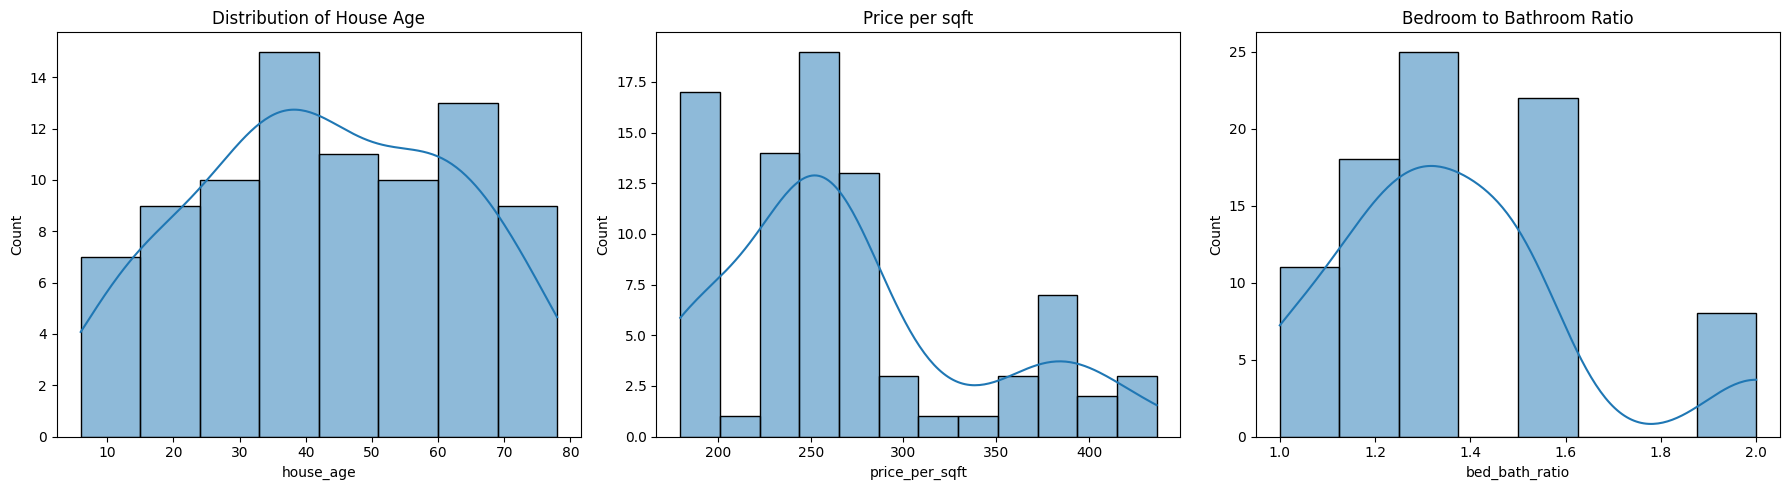

In [4]:
# 5. Visualize the New Features
# Plot distributions of the new features to check if they make sense

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['house_age'], kde=True, ax=axs[0])
axs[0].set_title('Distribution of House Age')

sns.histplot(df['price_per_sqft'], kde=True, ax=axs[1])
axs[1].set_title('Price per sqft')

sns.histplot(df['bed_bath_ratio'], kde=True, ax=axs[2])
axs[2].set_title('Bedroom to Bathroom Ratio')

plt.tight_layout()
plt.show()


In [6]:
# Save Final Engineering Features (Human-Readable CSV)
selected_columns = [
    'price',
    'sqft',
    'bedrooms',
    'bathrooms',
    'location', 
    'year_built',
    'condition',
    'house_age',
    'price_per_sqft',
    'bed_bath_ratio'
]

df[selected_columns].to_csv('../data/processed/data_scientists_features.csv',
                            index=False)
print('Saved human-readable engineered features to ../data/processed/data_scientist_features.csv')


Saved human-readable engineered features to ../data/processed/data_scientist_features.csv
